In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
#from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# CAMERON GOHARBIN - A15325864 - 118A FINAL PROJECT CODE

# Model Compare Function

---

---





In [ ]:
def modelCompare(X,Y,test_itrs,param_dict):
  
  model_performances = []

  for i in range(test_itrs):

    rand_indeces = np.random.permutation(20000)

    X_shuff = X.iloc[rand_indeces][0:5000]
    Y_shuff = Y.iloc[rand_indeces][0:5000]

    for model_name, model in param_dict.items():
      
      #print(model_name, " Parameters:", model['parameters'],'\n')

      grid_search = GridSearchCV(model['model'],model['parameters'],cv=5,n_jobs=-1,scoring='accuracy')

      start = time.time()

      grid_search.fit(X_shuff,Y_shuff)

      end = time.time()

      print(model_name, " run time: ", (end-start), " seconds" )

      grid_search_df = pd.DataFrame(grid_search.cv_results_)
      
      model_performances.append({'model' : model_name,
                     'params' : grid_search_df.iloc[grid_search.best_index_]['params'],
                     'mean test score' : grid_search_df.iloc[grid_search.best_index_]['mean_test_score'],
                     'std  test score' : grid_search_df.iloc[grid_search.best_index_]['std_test_score'],
                     'mean fit time' : grid_search_df.iloc[grid_search.best_index_]['mean_fit_time'],
                     'std fit time' : grid_search_df.iloc[grid_search.best_index_]['std_fit_time'],
                     'mean score time' : grid_search_df.iloc[grid_search.best_index_]['mean_score_time'], 
                     'std score time' : grid_search_df.iloc[grid_search.best_index_]['std_score_time'],
                     })
  
  model_performances = pd.DataFrame(model_performances)
  model_performances = model_performances.set_index('model')

  return model_performances

# Data Preprocessing (1)

---

---
(note: using StandardScalar)




## Letter Recognition Dataset Preprocessing

---
    Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)


---








In [ ]:
letter_df = pd.read_csv("drive/MyDrive/Colab Notebooks/letter-recognition.data",names = ['lettr','x-box','y-box','width','high','onpix','x-bar'
                                                                    ,'y-bar','x2bar','y2bar','xybar','x2ybr','xy2br'
                                                                    ,'x-ege','xegvy','y-ege','yegvx'])
letter_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#Converting A-M as negative class and N-Z as positive class (Converting to binary classification)

letter_class = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0, 
                'N':1,'O':1,'P':1,'Q':1,'R':1,'S':1,'T':1,'U':1,'V':1,'W':1,'X':1,'Y':1,'Z':1}
letter_df['class'] = [letter_class[i] for i in letter_df.lettr]

letter_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,1
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,0
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,0
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,1
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,0
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,0
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,1
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,1


In [ ]:
X_letr = letter_df.drop(['lettr', 'class'], axis=1)
Y_letr = letter_df['class']

X_letr = pd.DataFrame(preprocessing.scale(X_letr))

X_letr,Y_letr

(            0        1        2        3   ...       12       13       14       15
 0     -1.05770  0.29188 -1.05328 -0.16470  ... -1.30595 -0.21908 -1.43815  0.12291
 1      0.51038  1.50236 -1.05328  0.71973  ... -0.44849 -0.21908  0.12008  1.35944
 2     -0.01231  1.19974  0.43591  1.16195  ... -0.01976 -0.86563 -0.26948  0.74118
 3      1.55577  1.19974  0.43591  0.27751  ...  1.26642  1.07401 -0.65904  0.12291
 4     -1.05770 -1.82646 -1.05328 -1.93357  ... -0.87722 -0.86563  0.50964  1.35944
 ...        ...      ...      ...      ...  ...      ...      ...      ...      ...
 19995 -1.05770 -1.52384 -1.05328 -1.04914  ... -0.44849 -0.21908 -0.26948 -0.49535
 19996  1.55577  0.89712  1.42870  1.16195  ... -0.44849  0.42746 -0.26948 -0.49535
 19997  1.03308  0.59450  0.43591  0.71973  ... -0.44849  2.36710 -0.65904 -2.35015
 19998 -1.05770 -1.22122 -0.55688 -1.49135  ... -0.87722  0.42746  0.50964  0.12291
 19999 -0.01231  0.59450  0.43591  0.27751  ... -0.44849 -0.86563 -0.65904  

## Covtype Dataset Preprocessing

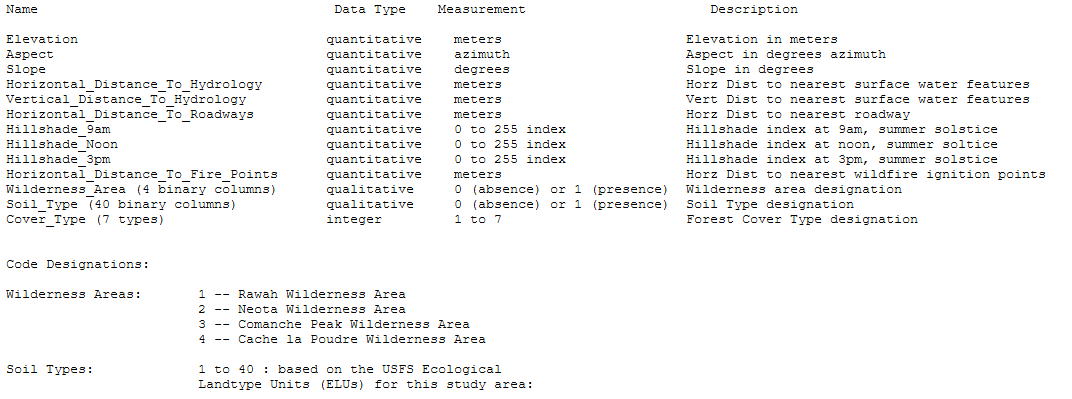

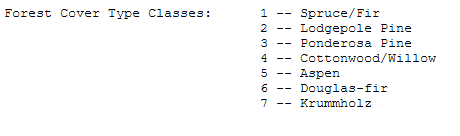

Class distribution:

           Number of records of Spruce-Fir:                211840 
           Number of records of Lodgepole Pine:            283301 
           Number of records of Ponderosa Pine:             35754 
           Number of records of Cottonwood/Willow:           2747 
           Number of records of Aspen:                       9493 
           Number of records of Douglas-fir:                17367 
           Number of records of Krummholz:                  20510  
           Number of records of other:                          0  
		
           Total records:                                  581012

In [ ]:
covtype_df = pd.read_csv("drive/MyDrive/Colab Notebooks/covtype.data",header = None)
covtype_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
#Converting to binary classification: Lodgepole Pine (largest class) = 1, rest = 0. This also equalizes the instance sizes
covtype_class = {2:1,1:0,3:0,4:0,5:0,6:0,7:0}
covtype_df['class'] = [covtype_class[i] for i in covtype_df[54]]
covtype_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [ ]:
#Splitting data into attributes (X) and classification (Y) components
X_cov = covtype_df.drop(['class'], axis=1)
X_cov = X_cov.drop(X_cov.columns[54],axis=1)
X_cov = pd.DataFrame(preprocessing.scale(X_cov))

Y_cov = covtype_df['class']
X_cov,Y_cov

(             0        1        2        3   ...       50       51       52       53
 0      -1.29781 -0.93516 -1.48282 -0.05377  ... -0.02265 -0.16596 -0.15601 -0.12365
 1      -1.31923 -0.89048 -1.61636 -0.27019  ... -0.02265 -0.16596 -0.15601 -0.12365
 2      -0.55491 -0.14884 -0.68156 -0.00672  ... -0.02265 -0.16596 -0.15601 -0.12365
 3      -0.62277 -0.00587  0.52032 -0.12904  ... -0.02265 -0.16596 -0.15601 -0.12365
 4      -1.30138 -0.98877 -1.61636 -0.54777  ... -0.02265 -0.16596 -0.15601 -0.12365
 ...         ...      ...      ...      ...  ...      ...      ...      ...      ...
 581007 -2.01213 -0.02374  0.78741 -0.86770  ... -0.02265 -0.16596 -0.15601 -0.12365
 581008 -2.02999 -0.03268  0.65387 -0.95238  ... -0.02265 -0.16596 -0.15601 -0.12365
 581009 -2.04785  0.02987  0.38678 -0.98532  ... -0.02265 -0.16596 -0.15601 -0.12365
 581010 -2.05499  0.12816  0.11969 -0.98532  ... -0.02265 -0.16596 -0.15601 -0.12365
 581011 -2.05856  0.08349 -0.14739 -0.98532  ... -0.02265 -0.1659

## Adult Dataset Preprocessing

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, 
Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, 
Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: countries as strings

In [ ]:
adult_df = pd.read_csv("drive/MyDrive/Colab Notebooks/adult.data",header = None, names = ['age','workclass','fnlwgt','education','education-num',
                          'martial_status','occupation','relationship','race','sex','capital-gain','capital-loss','weekly-hrs','native-country','income'])

adult_df = adult_df.drop(['education-num'],axis =1)
inc_class = {' <=50K' : 0 , ' >50K' : 1}
adult_df['inc_class'] = [inc_class[i] for i in adult_df.income]
adult_df = adult_df.drop(['income'], axis = 1)

adult_df

,age,workclass,fnlwgt,education,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,weekly-hrs,native-country,inc_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
# Converting nominal data to one hot encoding
adult_df = pd.get_dummies(adult_df)
adult_df

,age,fnlwgt,capital-gain,capital-loss,weekly-hrs,inc_class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,martial_status_ Divorced,martial_status_ Married-AF-spouse,martial_status_ Married-civ-spouse,martial_status_ Married-spouse-absent,martial_status_ Never-married,martial_status_ Separated,martial_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,0,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_adult = adult_df.drop(['inc_class'], axis = 1)
X_adult = pd.DataFrame(preprocessing.scale(X_adult))

Y_adult = adult_df['inc_class']
X_adult,Y_adult

(           0        1        2        3    ...      103      104      105      106
 0      0.03067 -1.06361  0.14845 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 1      0.83711 -1.00871 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 2     -0.04264  0.24508 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 3      1.05705  0.42580 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 4     -0.77577  1.40818 -0.14592 -0.21666  ... -0.02416 -2.93295 -0.04541 -0.02217
 ...        ...      ...      ...      ...  ...      ...      ...      ...      ...
 32556 -0.84908  0.63974 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 32557  0.10398 -0.33543 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 32558  1.42361 -0.35878 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 32559 -1.21564  0.11096 -0.14592 -0.21666  ... -0.02416  0.34095 -0.04541 -0.02217
 32560  0.98373  0.92989  1.88842 -0.21666  ... -0.02416  0.34095 -0.04541 -

# Misc Scratch Testing

---

---





## Testing 1, 5fold trial for k=5

In [ ]:
train_test_split?

In [ ]:
## Split data into training and testing sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, Y_train)
## See how the model performs on the test data.
knn.score(X_test, Y_test), knn.score(X_train,Y_train)

(0.977, 0.9878666666666667)

In [ ]:
%%time
scores = cross_val_score(knn,X_train,Y_train,cv=5,scoring = 'accuracy')
scores

CPU times: user 2.92 s, sys: 2.24 ms, total: 2.93 s
Wall time: 2.92 s


array([0.97066667, 0.97233333, 0.97066667, 0.977     , 0.97166667])

In [ ]:
scores.mean()

0.9724666666666668

## Testing implementing a full trial for 26 values of k from k = 1 to k=500

In [ ]:
np.linspace(1,500,26,dtype = int)

array([  1,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500])

In [ ]:
%%time

k_vals = np.linspace(1,500,26,dtype = int)

acc_scores2 = np.zeros(len(k_vals))

for k in range(len(k_vals)): 
    knn = KNeighborsClassifier(n_neighbors=k_vals[k])
    acc_score = cross_val_score(knn,X,Y,cv=KFold(n_splits=5, shuffle=True),scoring = 'accuracy')
    acc_scores2[k] = acc_score.mean()
    
acc_scores2

CPU times: user 5min 12s, sys: 3.16 s, total: 5min 15s
Wall time: 5min 15s


array([0.9785 , 0.96275, 0.9453 , 0.9243 , 0.90925, 0.8973 , 0.88285,
       0.8731 , 0.86445, 0.85915, 0.85375, 0.8458 , 0.8402 , 0.83185,
       0.8282 , 0.82545, 0.8222 , 0.8189 , 0.81435, 0.8084 , 0.8045 ,
       0.8025 , 0.7988 , 0.79455, 0.79245, 0.789  ])

In [ ]:
%%time

k_vals = np.linspace(1,500,26,dtype = int)

acc_scores2 = np.zeros(len(k_vals))

for k in range(len(k_vals)): 
    knn = KNeighborsClassifier(n_neighbors=k_vals[k])
    acc_score = cross_val_score(knn,X,Y,cv=KFold(n_splits=5, shuffle=True),scoring = 'accuracy')
    acc_scores2[k] = acc_score.mean()
    
acc_scores2

CPU times: user 5min 5s, sys: 2.39 s, total: 5min 7s
Wall time: 5min 7s


array([0.97805, 0.9627 , 0.9437 , 0.926  , 0.91075, 0.89605, 0.88575,
       0.8757 , 0.8672 , 0.85845, 0.8543 , 0.84745, 0.8405 , 0.83425,
       0.82995, 0.8265 , 0.822  , 0.81915, 0.81365, 0.81145, 0.8063 ,
       0.80245, 0.79735, 0.7954 , 0.79095, 0.7886 ])

In [ ]:
def knnTest(X,Y,test_itrs,k_vals):
    
    acc_scores = np.zeros((len(k_vals),test_itrs+1))
    
    avg_time_vec = np.zeros((len(k_vals),test_itrs+1))

    for i in range(test_itrs):
        
        for k in range(len(k_vals)): 
            
            knn = KNeighborsClassifier(n_neighbors=k_vals[k])
            
            start=time.time()
            
            acc_score = cross_val_score(knn,X,Y,cv=KFold(n_splits=5, shuffle=True),n_jobs = -2,scoring = 'accuracy')
            
            end=time.time()
            
            acc_scores[k,i] = acc_score.mean()
            
            avg_time_vec[k,i] = end-start
        
    print(acc_scores)
    
    return acc_scores

In [ ]:
acc_scores = np.zeros((26,3))
acc_scores

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
%%time

k_vals = np.linspace(1,500,26,dtype = int)

knn = KNeighborsClassifier()

knn_params = {'n_neighbors':k_vals}

grid_search = GridSearchCV(knn,knn_params,cv=5,n_jobs=-2,scoring = 'accuracy')

grid_search.fit(X,Y)

CPU times: user 4min 59s, sys: 2.86 s, total: 5min 2s
Wall time: 5min 2s


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-2,
             param_grid={'n_neighbors': array([  1,  20,  40,  60,  80, 100, 120, 140, 160, 180, 200, 220, 240,
       260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
grid_search_df = pd.DataFrame(grid_search.cv_results_)
grid_search_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.074298,0.013344,0.546568,0.050178,1,{'n_neighbors': 1},0.97700,0.97900,0.98075,0.97900,0.97675,0.97850,0.001475,1
1,0.051800,0.002824,1.032331,0.031889,20,{'n_neighbors': 20},0.96075,0.96600,0.96450,0.96500,0.95750,0.96275,0.003170,2
2,0.054028,0.004119,1.291409,0.031909,40,{'n_neighbors': 40},0.94675,0.94775,0.94550,0.94725,0.93925,0.94530,0.003116,3
3,0.057663,0.009269,1.619749,0.148283,60,{'n_neighbors': 60},0.92825,0.92600,0.92225,0.92675,0.91825,0.92430,0.003614,4
4,0.054501,0.001951,1.679171,0.073638,80,{'n_neighbors': 80},0.91025,0.91000,0.90950,0.91625,0.90025,0.90925,0.005131,5
5,0.055243,0.003316,1.817351,0.037090,100,{'n_neighbors': 100},0.90025,0.89775,0.89200,0.90600,0.89050,0.89730,0.005638,6
6,0.053626,0.004423,1.892610,0.043645,120,{'n_neighbors': 120},0.88850,0.88525,0.87900,0.88475,0.87675,0.88285,0.004320,7
7,0.053160,0.002988,1.983931,0.026164,140,{'n_neighbors': 140},0.87800,0.87500,0.87075,0.87575,0.86600,0.87310,0.004256,8
8,0.055038,0.003249,2.100692,0.038649,160,{'n_neighbors': 160},0.86550,0.86975,0.86500,0.86850,0.85350,0.86445,0.005758,9
9,0.055062,0.005098,2.163972,0.011506,180,{'n_neighbors': 180},0.85975,0.86875,0.86000,0.86400,0.84325,0.85915,0.008597,10


## Testing SVM

In [ ]:

reg_param = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,
            10**1,10**2,10**3]
reg_param

[1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [ ]:
%%time

svm = SVC()

##regularization param from 10^-7 to 10^3 in factors of 10
##Have to split it, because I want gamma to only change for rbf

reg_param = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,
            10**1,10**2,10**3]

# svm_params = [{'kernel':['rbf'],
#               'gamma':[.001,.005,.01,.05,.1,.5,1,2],
#               'C':reg_param},
              
#               {'kernel':['linear'],
#               'C':reg_param},
              
#              {'kernel':['poly'],-
#              'degree':[2,3],
#              'C':reg_param}]

svm_params = {'kernel':['rbf'],
              'gamma':[.001,.005,.01,.05,.1,.5,1,2],
              'C':reg_param}
      
    
grid_search_svm = GridSearchCV(svm,svm_params,cv=5,n_jobs=-1,scoring = 'accuracy')

grid_search_svm.fit(X[0:5000],Y[0:5000])

CPU times: user 4.11 s, sys: 190 ms, total: 4.3 s
Wall time: 4min 47s


In [ ]:
#pd.set_option('display.max_rows', None)
grid_search_svm_df = pd.DataFrame(grid_search_svm.cv_results_)
grid_search_svm_df

NameError: ignored

## Testing Logistic Regression

In [ ]:
logreg = LogisticRegression()

logreg_params = {'C': [10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2]}

#grid_search_logreg = GridSearchCV(logreg,logreg_params,cv=5,n_jobs=-1,scoring='accuracy')
grid_search_logreg = GridSearchCV(logreg,logreg_params,cv=5,n_jobs=-1)

grid_search_logreg.fit(X_letr[0:5000],Y_letr[0:5000])
y_pred = grid_search_logreg.predict(X_letr[5000:])

In [ ]:
print(accuracy_score(Y_letr[5000:], y_pred))

0.7234


In [ ]:
grid_search_logreg_df = pd.DataFrame(grid_search_logreg.cv_results_)
grid_search_logreg_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032289,0.004163,0.002065,0.000172,0.0001,{'C': 0.0001},0.698,0.682,0.654,0.691,0.688,0.6826,0.015200,7
1,0.056721,0.004619,0.001992,0.000065,0.001,{'C': 0.001},0.721,0.704,0.705,0.719,0.721,0.7140,0.007797,6
2,0.090114,0.017582,0.002007,0.000066,0.01,{'C': 0.01},0.730,0.723,0.730,0.727,0.724,0.7268,0.002926,5
3,0.090731,0.013673,0.002035,0.000101,0.1,{'C': 0.1},0.730,0.724,0.732,0.731,0.723,0.7280,0.003742,4
4,0.079639,0.018981,0.002015,0.000106,1,{'C': 1},0.732,0.725,0.732,0.732,0.725,0.7292,0.003429,2
5,0.083272,0.008844,0.002191,0.000105,10,{'C': 10},0.732,0.725,0.732,0.732,0.725,0.7292,0.003429,2
6,0.083059,0.012705,0.001950,0.000318,100,{'C': 100},0.733,0.725,0.732,0.732,0.725,0.7294,0.003611,1


In [ ]:
grid_search_logreg_df['mean_test_score'].mean()

0.7198857142857144

In [ ]:
y = []
#z = grid_search_logreg_df.iloc[grid_search_logreg.best_index_][['params','mean_test_score']]
y.append({'model': 'logR',
          'params' : grid_search_logreg_df.iloc[grid_search_logreg.best_index_]['params'],
           'mean test score' : grid_search_logreg_df.iloc[grid_search_logreg.best_index_]['mean_test_score']
          })
y.append({'model': 'logR',
          'params' : grid_search_logreg_df.iloc[grid_search_logreg.best_index_]['params'],
           'mean test score' : grid_search_logreg_df.iloc[grid_search_logreg.best_index_]['mean_test_score']
          })
#y.append(z)
#y.append({'model name' : ['logR','logR']})
df = pd.DataFrame(y)
df = df.reset_index(drop=True)
df = df.set_index('model') 
df



,params,mean test score
model,,
logR,{'C': 100},0.7294
logR,{'C': 100},0.7294


## Testing

In [ ]:
knn_test = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn_test.fit(X_letr,Y_letr)
end = time.time()
t1 = end-start
t1

0.12349295616149902

In [ ]:
svm_test = SVC(kernel = 'rbf', gamma = .5, C = 10)
start=time.time()
svm_test.fit(X_letr,Y_letr)
end = time.time()
t2 = end-start
t2

42.564191579818726

In [ ]:
logr_test = LogisticRegression(C = 1)
start=time.time()
logr_test.fit(X_letr,Y_letr)
end = time.time()
t3 = end-start
t3

0.09390974044799805


0.09390974044799805

In [ ]:
time_df = pd.DataFrame(columns = ['KNN','SVM','LogR'], index = ['Letter Data Fit Time'])
time_df.loc['Letter Data Fit Time'] = [t1,t2,t3]
time_df

,KNN,SVM,LogR
Letter Data Fit Time,0.12349,42.56419,0.09391


# Running Trials (1)

---

---





## Setting up hyperparam arguments for function use

In [ ]:
k_vals = np.linspace(1,500,26,dtype = int)  #knn k values

gamma_svm_param = [.001,.005,.01,.05,.1,.5,1,2]  #radial Width

c_svm_param = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,  #regularization param
            10**1,10**2,10**3]

c_logreg_params = [10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]  #regularization param

param_dict = {'KNN': {'model': KNeighborsClassifier() ,
                      'parameters' : 
                        {'n_neighbors' : k_vals}
                      },
              'SVM' : {'model' : SVC(),
                       'parameters' : 
                          {'kernel':['rbf'],
                            'gamma':gamma_svm_param,
                            'C':c_svm_param}
                       },
              'LOGR' : {'model' : LogisticRegression(),
                        'parameters' : 
                        {'C': c_logreg_params}
                        } 
              }

## Letter Data Trial

In [ ]:
model_performances_letr = modelCompare(X_letr,Y_letr,3,param_dict)
model_performances_letr = model_performances_letr.sort_values(by = 'model')
model_performances_letr

KNN  run time:  30.052053213119507  seconds
SVM  run time:  339.9029755592346  seconds
LOGR  run time:  1.0205345153808594  seconds
KNN  run time:  28.72412610054016  seconds
SVM  run time:  340.17179322242737  seconds
LOGR  run time:  1.0438604354858398  seconds
KNN  run time:  28.297488927841187  seconds
SVM  run time:  338.56006956100464  seconds
LOGR  run time:  1.0093486309051514  seconds


,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 1},0.94160,0.00864,0.01880,0.00224,0.12953,0.00486
KNN,{'n_neighbors': 1},0.94840,0.00408,0.02825,0.01189,0.14680,0.01579
KNN,{'n_neighbors': 1},0.94380,0.00538,0.02180,0.00690,0.13810,0.01480
LOGR,{'C': 1},0.73740,0.01699,0.03131,0.00183,0.00195,0.00006
LOGR,{'C': 0.1},0.71200,0.01168,0.02855,0.00114,0.00204,0.00020
LOGR,{'C': 1},0.73460,0.01382,0.03102,0.00258,0.00196,0.00003
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95000,0.01014,1.49254,0.02176,0.19378,0.00513
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95660,0.00755,1.46933,0.00551,0.18759,0.00365
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95300,0.00860,1.46432,0.00905,0.18733,0.00406


## Forest Cover Data Trial

In [ ]:
model_performances_cov = modelCompare(X_cov,Y_cov,3,param_dict)
model_performances_cov = model_performances_cov.sort_values(by = 'model')
model_performances_cov

KNN  run time:  61.97531223297119  seconds
SVM  run time:  417.68506503105164  seconds
LOGR  run time:  2.630189895629883  seconds
KNN  run time:  62.4082772731781  seconds
SVM  run time:  401.76429653167725  seconds
LOGR  run time:  2.568725347518921  seconds
KNN  run time:  62.17431998252869  seconds
SVM  run time:  409.6433484554291  seconds
LOGR  run time:  2.723101854324341  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 20},0.87660,0.01576,0.06792,0.00132,0.67779,0.00567
KNN,{'n_neighbors': 1},0.88560,0.00683,0.08247,0.01847,0.61049,0.00660
KNN,{'n_neighbors': 1},0.88460,0.00686,0.08546,0.01991,0.61717,0.01336
LOGR,{'C': 0.001},0.84980,0.00958,0.03529,0.00672,0.00219,0.00022
LOGR,{'C': 0.01},0.85600,0.00955,0.03990,0.00086,0.00215,0.00007
LOGR,{'C': 1},0.86280,0.00601,0.13506,0.00213,0.00468,0.00528
SVM,"{'C': 10, 'gamma': 0.05, 'kernel': 'rbf'}",0.88960,0.01297,1.03314,0.02897,0.17074,0.00373
SVM,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.89120,0.00542,1.08876,0.02116,0.17800,0.00395
SVM,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}",0.89280,0.00752,1.29347,0.02630,0.15416,0.00234


## Adult Income Data *Trial*

In [ ]:
model_performances_adult = modelCompare(X_adult,Y_adult,3,param_dict)

KNN  run time:  110.07480835914612  seconds
SVM  run time:  700.7396948337555  seconds
LOGR  run time:  3.2277979850769043  seconds
KNN  run time:  109.9229154586792  seconds
SVM  run time:  706.8459506034851  seconds
LOGR  run time:  3.085688591003418  seconds
KNN  run time:  111.75959277153015  seconds
SVM  run time:  699.6376700401306  seconds
LOGR  run time:  2.9209344387054443  seconds


In [ ]:
model_performances_adult = model_performances_adult.sort_values(by = 'model')
model_performances_adult

,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 180},0.82220,0.00584,0.10894,0.00112,1.55312,0.01609
KNN,{'n_neighbors': 180},0.82860,0.00816,0.10983,0.00100,1.56069,0.01079
KNN,{'n_neighbors': 220},0.82740,0.00902,0.11158,0.00496,1.58725,0.01729
LOGR,{'C': 1},0.84520,0.00793,0.15573,0.00915,0.00244,0.00014
LOGR,{'C': 1},0.85120,0.00668,0.14061,0.00157,0.00239,0.00017
LOGR,{'C': 0.1},0.85300,0.00769,0.08444,0.00708,0.00232,0.00017
SVM,"{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}",0.84160,0.00742,1.86031,0.03953,0.32797,0.01029
SVM,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.84360,0.00755,1.61501,0.03408,0.33030,0.00607
SVM,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.85160,0.00686,1.59130,0.03112,0.32631,0.00313


# Results (1)

---

---





In [ ]:
#Accuracy measures of each algorithm used on each data set

pd.options.display.float_format = '{:,.5f}'.format
results = pd.DataFrame(columns = ['Ltr Data', 'Forest Cov Data', 'Adlt Inc Data'], index = ['SVM','KNN','LogR'])

results['Ltr Data']['SVM'] = model_performances_letr['mean test score']['SVM'].mean()
results['Ltr Data']['KNN'] = model_performances_letr['mean test score']['KNN'].mean()
results['Ltr Data']['LogR'] = model_performances_letr['mean test score']['LOGR'].mean()

results['Forest Cov Data']['SVM'] = model_performances_cov['mean test score']['SVM'].mean()
results['Forest Cov Data']['KNN'] = model_performances_cov['mean test score']['KNN'].mean()
results['Forest Cov Data']['LogR'] = model_performances_cov['mean test score']['LOGR'].mean()

results['Adlt Inc Data']['SVM'] = model_performances_adult['mean test score']['SVM'].mean()
results['Adlt Inc Data']['KNN'] = model_performances_adult['mean test score']['KNN'].mean()
results['Adlt Inc Data']['LogR'] = model_performances_adult['mean test score']['LOGR'].mean()

print("\nAccuracy Measures\n------------------")
results


Accuracy Measures
------------------


,Ltr Data,Forest Cov Data,Adlt Inc Data
SVM,0.95320,0.89120,0.84560
KNN,0.94460,0.88227,0.82607
LogR,0.72800,0.85620,0.84980


In [ ]:
#Accuracy of each data set meaned over all data sets

results2 = pd.DataFrame(columns=['Accuracy Over All Data Sets'],index = ['SVM','KNN','LogR'])

results2['Accuracy Over All Data Sets']['SVM'] = results.loc['SVM'].mean()
results2['Accuracy Over All Data Sets']['KNN'] = results.loc['KNN'].mean()
results2['Accuracy Over All Data Sets']['LogR'] = results.loc['LogR'].mean()

results2

,Accuracy Over All Data Sets
SVM,0.89667
KNN,0.88431
LogR,0.81133


In [ ]:
#P values comparing algorithms across all data sets

results3 = pd.DataFrame(columns = ['T Statistic','P Values'],index = ['SVM:KNN','KNN:LogR','SVM:LogR'])

results3.loc['SVM:KNN'] = stats.ttest_ind(results.loc['SVM'],results.loc['KNN'])
results3.loc['KNN:LogR'] = stats.ttest_ind(results.loc['KNN'],results.loc['LogR'])
results3.loc['SVM:LogR'] = stats.ttest_ind(results.loc['SVM'],results.loc['LogR'])

results3

,T Statistic,P Values
SVM:KNN,0.26683,0.80279
KNN:LogR,1.35250,0.24762
SVM:LogR,1.63866,0.17663


In [ ]:
#P values comparing data sets across all algorithms

results4 = pd.DataFrame(columns = ['T Statistic','P Values'],index = ['Ltr:Frst','Frst:Adlt','Ltr:Adlt'])

results4.loc['Ltr:Frst'] = stats.ttest_ind(results['Ltr Data'],results['Forest Cov Data'])
results4.loc['Frst:Adlt'] = stats.ttest_ind(results['Forest Cov Data'],results['Adlt Inc Data'])
results4.loc['Ltr:Adlt'] = stats.ttest_ind(results['Ltr Data'],results['Adlt Inc Data'])

results4

,T Statistic,P Values
Ltr:Frst,-0.01732,0.98701
Frst:Adlt,2.81885,0.04788
Ltr:Adlt,0.46973,0.66301


# Data Preprocessing (2)

---

---
(note: using MinMaxScalar)




## Letter Recognition Dataset Preprocessing

---
    Attribute Information:
	 1.	lettr	capital letter	(26 values from A to Z)
	 2.	x-box	horizontal position of box	(integer)
	 3.	y-box	vertical position of box	(integer)
	 4.	width	width of box			(integer)
	 5.	high 	height of box			(integer)
	 6.	onpix	total # on pixels		(integer)
	 7.	x-bar	mean x of on pixels in box	(integer)
	 8.	y-bar	mean y of on pixels in box	(integer)
	 9.	x2bar	mean x variance			(integer)
	10.	y2bar	mean y variance			(integer)
	11.	xybar	mean x y correlation		(integer)
	12.	x2ybr	mean of x * x * y		(integer)
	13.	xy2br	mean of x * y * y		(integer)
	14.	x-ege	mean edge count left to right	(integer)
	15.	xegvy	correlation of x-ege with y	(integer)
	16.	y-ege	mean edge count bottom to top	(integer)
	17.	yegvx	correlation of y-ege with x	(integer)


---








In [ ]:
letter_df = pd.read_csv("drive/MyDrive/Colab Notebooks/letter-recognition.data",names = ['lettr','x-box','y-box','width','high','onpix','x-bar'
                                                                    ,'y-bar','x2bar','y2bar','xybar','x2ybr','xy2br'
                                                                    ,'x-ege','xegvy','y-ege','yegvx'])
letter_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8


In [ ]:
#Converting A-M as negative class and N-Z as positive class (Converting to binary classification)

letter_class = {'A':0,'B':0,'C':0,'D':0,'E':0,'F':0,'G':0,'H':0,'I':0,'J':0,'K':0,'L':0,'M':0, 
                'N':1,'O':1,'P':1,'Q':1,'R':1,'S':1,'T':1,'U':1,'V':1,'W':1,'X':1,'Y':1,'Z':1}
letter_df['class'] = [letter_class[i] for i in letter_df.lettr]

letter_df

,lettr,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx,class
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8,1
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10,0
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9,0
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8,1
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7,0
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7,0
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4,1
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8,1


In [ ]:
X_letr2 = letter_df.drop(['lettr', 'class'], axis=1)
Y_letr2 = letter_df['class']

mm_scaler_letr = MinMaxScaler()

X_letr2 = pd.DataFrame(mm_scaler.fit_transform(X_letr2))

X_letr2,Y_letr2

(           0       1       2       3   ...      12      13      14      15
 0     0.13333 0.53333 0.20000 0.33333  ... 0.00000 0.53333 0.00000 0.53333
 1     0.33333 0.80000 0.20000 0.46667  ... 0.13333 0.53333 0.26667 0.66667
 2     0.26667 0.73333 0.40000 0.53333  ... 0.20000 0.46667 0.20000 0.60000
 3     0.46667 0.73333 0.40000 0.40000  ... 0.40000 0.66667 0.13333 0.53333
 4     0.13333 0.06667 0.20000 0.06667  ... 0.06667 0.46667 0.33333 0.66667
 ...       ...     ...     ...     ...  ...     ...     ...     ...     ...
 19995 0.13333 0.13333 0.20000 0.20000  ... 0.13333 0.53333 0.20000 0.46667
 19996 0.46667 0.66667 0.53333 0.53333  ... 0.13333 0.60000 0.20000 0.46667
 19997 0.40000 0.60000 0.40000 0.46667  ... 0.13333 0.80000 0.13333 0.26667
 19998 0.13333 0.20000 0.26667 0.13333  ... 0.06667 0.60000 0.33333 0.53333
 19999 0.26667 0.60000 0.40000 0.40000  ... 0.13333 0.46667 0.13333 0.53333
 
 [20000 rows x 16 columns], 0        1
 1        0
 2        0
 3        1
 4        0

## Covtype Dataset Preprocessing

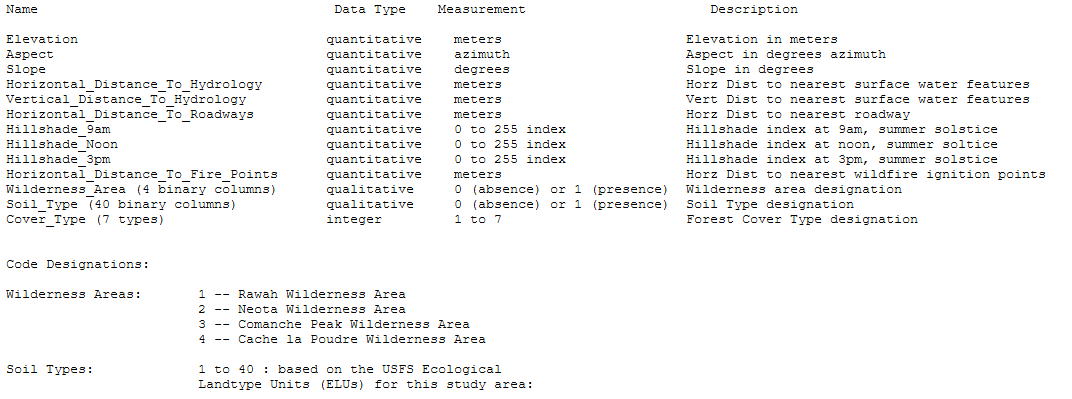

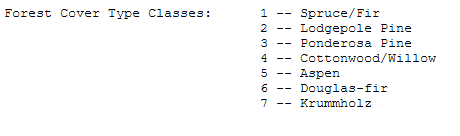

Class distribution:

           Number of records of Spruce-Fir:                211840 
           Number of records of Lodgepole Pine:            283301 
           Number of records of Ponderosa Pine:             35754 
           Number of records of Cottonwood/Willow:           2747 
           Number of records of Aspen:                       9493 
           Number of records of Douglas-fir:                17367 
           Number of records of Krummholz:                  20510  
           Number of records of other:                          0  
		
           Total records:                                  581012

In [ ]:
covtype_df = pd.read_csv("drive/MyDrive/Colab Notebooks/covtype.data",header = None)
covtype_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3


In [ ]:
#Converting to binary classification: Lodgepole Pine (largest class) = 1, rest = 0. This also equalizes the instance sizes
covtype_class = {2:1,1:0,3:0,4:0,5:0,6:0,7:0}
covtype_df['class'] = [covtype_class[i] for i in covtype_df[54]]
covtype_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,class
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,1
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581008,2391,152,19,67,12,95,240,237,119,845,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581009,2386,159,17,60,7,90,236,241,130,854,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
581010,2384,170,15,60,5,90,230,245,143,864,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0


In [ ]:
#Splitting data into attributes (X) and classification (Y) components
X_cov = covtype_df.drop(['class'], axis=1)
X_cov = X_cov.drop(X_cov.columns[54],axis=1)

mm_scaler_cov = MinMaxScaler()

X_cov = pd.DataFrame(mm_scaler_cov.fit_transform(X_cov))

Y_cov = covtype_df['class']
X_cov,Y_cov

(            0       1       2       3   ...      50      51      52      53
 0      0.36868 0.14167 0.04545 0.18468  ... 0.00000 0.00000 0.00000 0.00000
 1      0.36568 0.15556 0.03030 0.15175  ... 0.00000 0.00000 0.00000 0.00000
 2      0.47274 0.38611 0.13636 0.19184  ... 0.00000 0.00000 0.00000 0.00000
 3      0.46323 0.43056 0.27273 0.17323  ... 0.00000 0.00000 0.00000 0.00000
 4      0.36818 0.12500 0.03030 0.10952  ... 0.00000 0.00000 0.00000 0.00000
 ...        ...     ...     ...     ...  ...     ...     ...     ...     ...
 581007 0.26863 0.42500 0.30303 0.06084  ... 0.00000 0.00000 0.00000 0.00000
 581008 0.26613 0.42222 0.28788 0.04796  ... 0.00000 0.00000 0.00000 0.00000
 581009 0.26363 0.44167 0.25758 0.04295  ... 0.00000 0.00000 0.00000 0.00000
 581010 0.26263 0.47222 0.22727 0.04295  ... 0.00000 0.00000 0.00000 0.00000
 581011 0.26213 0.45833 0.19697 0.04295  ... 0.00000 0.00000 0.00000 0.00000
 
 [581012 rows x 54 columns], 0         0
 1         0
 2         1
 3     

## Adult Dataset Preprocessing

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, 
Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, 
Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: countries as strings

In [ ]:
adult_df = pd.read_csv("drive/MyDrive/Colab Notebooks/adult.data",header = None, names = ['age','workclass','fnlwgt','education','education-num',
                          'martial_status','occupation','relationship','race','sex','capital-gain','capital-loss','weekly-hrs','native-country','income'])

adult_df = adult_df.drop(['education-num'],axis =1)
inc_class = {' <=50K' : 0 , ' >50K' : 1}
adult_df['inc_class'] = [inc_class[i] for i in adult_df.income]
adult_df = adult_df.drop(['income'], axis = 1)

adult_df

,age,workclass,fnlwgt,education,martial_status,occupation,relationship,race,sex,capital-gain,capital-loss,weekly-hrs,native-country,inc_class
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [ ]:
# Converting nominal data to one hot encoding
adult_df = pd.get_dummies(adult_df)
adult_df

,age,fnlwgt,capital-gain,capital-loss,weekly-hrs,inc_class,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,education_ 1st-4th,education_ 5th-6th,education_ 7th-8th,education_ 9th,education_ Assoc-acdm,education_ Assoc-voc,education_ Bachelors,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,martial_status_ Divorced,martial_status_ Married-AF-spouse,martial_status_ Married-civ-spouse,martial_status_ Married-spouse-absent,martial_status_ Never-married,martial_status_ Separated,martial_status_ Widowed,occupation_ ?,occupation_ Adm-clerical,...,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,2174,0,40,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,0,0,13,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,0,0,40,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,0,0,38,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32557,40,154374,0,0,40,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32558,58,151910,0,0,40,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
32559,22,201490,0,0,20,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
X_adult = adult_df.drop(['inc_class'], axis = 1)

mm_scaler_ad = MinMaxScaler()

X_adult = pd.DataFrame(mm_scaler_ad.fit_transform(X_adult))

Y_adult = adult_df['inc_class']
X_adult,Y_adult

(          0       1       2       3    ...     103     104     105     106
 0     0.30137 0.04430 0.02174 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 1     0.45205 0.04824 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 2     0.28767 0.13811 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 3     0.49315 0.15107 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 4     0.15068 0.22149 0.00000 0.00000  ... 0.00000 0.00000 0.00000 0.00000
 ...       ...     ...     ...     ...  ...     ...     ...     ...     ...
 32556 0.13699 0.16640 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 32557 0.31507 0.09650 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 32558 0.56164 0.09483 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 32559 0.06849 0.12850 0.00000 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 32560 0.47945 0.18720 0.15024 0.00000  ... 0.00000 1.00000 0.00000 0.00000
 
 [32561 rows x 107 columns], 0        0
 1        0
 2        0
 3        0
 4        

# Running Trials (2)

---

---





## Setting up hyperparam arguments for function use

In [ ]:
k_vals = np.linspace(1,500,26,dtype = int)  #knn k values

gamma_svm_param = [.001,.005,.01,.05,.1,.5,1,2]  #radial Width

c_svm_param = [10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,  #regularization param
            10**1,10**2,10**3]

c_logreg_params = [10**-8,10**-7,10**-6,10**-5,10**-4,10**-3,10**-2,10**-1,10**0,10**1,10**2,10**3,10**4]  #ergularization param

param_dict = {'KNN': {'model': KNeighborsClassifier() ,
                      'parameters' : 
                        {'n_neighbors' : k_vals}
                      },
              'SVM' : {'model' : SVC(),
                       'parameters' : 
                          {'kernel':['rbf'],
                            'gamma':gamma_svm_param,
                            'C':c_svm_param}
                       },
              'LOGR' : {'model' : LogisticRegression(),
                        'parameters' : 
                        {'C': c_logreg_params}
                        } 
              }

## Letter Data Trial

In [ ]:
model_performances_letr = modelCompare(X_letr,Y_letr,3,param_dict)
model_performances_letr = model_performances_letr.sort_values(by = 'model')
model_performances_letr

KNN  run time:  30.360006093978882  seconds
SVM  run time:  338.4888665676117  seconds
LOGR  run time:  1.0377774238586426  seconds
KNN  run time:  28.48366379737854  seconds
SVM  run time:  341.1998152732849  seconds
LOGR  run time:  1.0216031074523926  seconds
KNN  run time:  28.760945558547974  seconds
SVM  run time:  339.0617492198944  seconds
LOGR  run time:  1.0144774913787842  seconds


,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 1},0.94700,0.00477,0.01818,0.00090,0.13831,0.01072
KNN,{'n_neighbors': 1},0.94120,0.00778,0.02128,0.00363,0.13479,0.01679
KNN,{'n_neighbors': 1},0.93860,0.00686,0.02207,0.00328,0.13725,0.01553
LOGR,{'C': 10},0.72720,0.01338,0.03000,0.00120,0.00207,0.00008
LOGR,{'C': 0.1},0.71400,0.00583,0.03033,0.00150,0.00200,0.00010
LOGR,{'C': 10},0.72080,0.01269,0.02914,0.00158,0.00200,0.00002
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95800,0.00626,1.48804,0.01342,0.19010,0.00569
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95460,0.00480,1.47890,0.00853,0.19275,0.00574
SVM,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}",0.95140,0.00650,1.51291,0.01156,0.18632,0.00305


## Forest Cover Data Trial

In [ ]:
model_performances_cov = modelCompare(X_cov,Y_cov,3,param_dict)
model_performances_cov = model_performances_cov.sort_values(by = 'model')
model_performances_cov

KNN  run time:  43.372612714767456  seconds
SVM  run time:  373.36629009246826  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LOGR  run time:  2.7674105167388916  seconds
KNN  run time:  41.44505453109741  seconds
SVM  run time:  352.1001024246216  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LOGR  run time:  2.769073247909546  seconds
KNN  run time:  40.51106929779053  seconds
SVM  run time:  349.8737111091614  seconds
LOGR  run time:  2.778585910797119  seconds


,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 1},0.87540,0.01145,0.04395,0.00128,0.21026,0.01420
KNN,{'n_neighbors': 1},0.88280,0.00926,0.05375,0.00962,0.20076,0.01351
KNN,{'n_neighbors': 1},0.87860,0.00824,0.06747,0.01516,0.28738,0.00458
LOGR,{'C': 10},0.84260,0.00768,0.13977,0.00252,0.00341,0.00227
LOGR,{'C': 1},0.85660,0.00258,0.13161,0.01042,0.00230,0.00011
LOGR,{'C': 1},0.85840,0.01366,0.12801,0.01127,0.00226,0.00011
SVM,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}",0.88060,0.00637,2.49195,0.11804,0.12433,0.00201
SVM,"{'C': 100, 'gamma': 2, 'kernel': 'rbf'}",0.89500,0.00944,1.13823,0.02900,0.12946,0.00457
SVM,"{'C': 100, 'gamma': 2, 'kernel': 'rbf'}",0.89060,0.00771,1.08178,0.03319,0.12805,0.00125


## Adult Income Data *Trial*

In [ ]:
model_performances_adult = modelCompare(X_adult,Y_adult,3,param_dict)

KNN  run time:  117.39985752105713  seconds
SVM  run time:  579.1239593029022  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LOGR  run time:  3.582656145095825  seconds
KNN  run time:  113.85272192955017  seconds
SVM  run time:  575.9576394557953  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LOGR  run time:  3.6726479530334473  seconds
KNN  run time:  115.48949098587036  seconds
SVM  run time:  593.001895904541  seconds
LOGR  run time:  3.567896842956543  seconds


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
model_performances_adult = model_performances_adult.sort_values(by = 'model')
model_performances_adult

,params,mean test score,std test score,mean fit time,std fit time,mean score time,std score time
model,,,,,,,
KNN,{'n_neighbors': 40},0.83000,0.01246,0.09373,0.00537,1.54662,0.00980
KNN,{'n_neighbors': 40},0.82520,0.01454,0.08955,0.00325,1.55765,0.02675
KNN,{'n_neighbors': 60},0.82860,0.01542,0.09290,0.00149,1.58812,0.01947
LOGR,{'C': 100},0.84640,0.01256,0.17921,0.01105,0.00243,0.00016
LOGR,{'C': 1000},0.84920,0.00783,0.19091,0.01326,0.00256,0.00008
LOGR,{'C': 1000},0.84400,0.00953,0.18394,0.00742,0.00380,0.00268
SVM,"{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}",0.84220,0.01182,2.30863,0.03955,0.31251,0.00326
SVM,"{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}",0.84540,0.01152,2.38767,0.04947,0.32477,0.00970
SVM,"{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf'}",0.84180,0.01053,2.43711,0.03816,0.32392,0.00727


# Results (2)

---

---





In [ ]:
#Accuracy measures of each algorithm used on each data set

pd.options.display.float_format = '{:,.5f}'.format
results = pd.DataFrame(columns = ['Ltr Data', 'Forest Cov Data', 'Adlt Inc Data'], index = ['SVM','KNN','LogR'])

results['Ltr Data']['SVM'] = model_performances_letr['mean test score']['SVM'].mean()
results['Ltr Data']['KNN'] = model_performances_letr['mean test score']['KNN'].mean()
results['Ltr Data']['LogR'] = model_performances_letr['mean test score']['LOGR'].mean()

results['Forest Cov Data']['SVM'] = model_performances_cov['mean test score']['SVM'].mean()
results['Forest Cov Data']['KNN'] = model_performances_cov['mean test score']['KNN'].mean()
results['Forest Cov Data']['LogR'] = model_performances_cov['mean test score']['LOGR'].mean()

results['Adlt Inc Data']['SVM'] = model_performances_adult['mean test score']['SVM'].mean()
results['Adlt Inc Data']['KNN'] = model_performances_adult['mean test score']['KNN'].mean()
results['Adlt Inc Data']['LogR'] = model_performances_adult['mean test score']['LOGR'].mean()

print("\nAccuracy Measures\n------------------")
results


Accuracy Measures
------------------


,Ltr Data,Forest Cov Data,Adlt Inc Data
SVM,0.95467,0.88873,0.84313
KNN,0.94227,0.87893,0.82793
LogR,0.72067,0.85253,0.84653


In [ ]:
#Accuracy of each data set meaned over all data sets

results2 = pd.DataFrame(columns=['Accuracy Over All Data Sets'],index = ['SVM','KNN','LogR'])

results2['Accuracy Over All Data Sets']['SVM'] = results.loc['SVM'].mean()
results2['Accuracy Over All Data Sets']['KNN'] = results.loc['KNN'].mean()
results2['Accuracy Over All Data Sets']['LogR'] = results.loc['LogR'].mean()

results2

,Accuracy Over All Data Sets
SVM,0.89551
KNN,0.88304
LogR,0.80658


In [ ]:
#P values comparing algorithms across all data sets

results3 = pd.DataFrame(columns = ['T Statistic','P Values'],index = ['SVM:KNN','KNN:LogR','SVM:LogR'])

results3.loc['SVM:KNN'] = stats.ttest_ind(results.loc['SVM'],results.loc['KNN'])
results3.loc['KNN:LogR'] = stats.ttest_ind(results.loc['KNN'],results.loc['LogR'])
results3.loc['SVM:LogR'] = stats.ttest_ind(results.loc['SVM'],results.loc['LogR'])

results3

,T Statistic,P Values
SVM:KNN,0.26938,0.80096
KNN:LogR,1.40984,0.23139
SVM:LogR,1.65250,0.17378


In [ ]:
#P values comparing data sets across all algorithms

results4 = pd.DataFrame(columns = ['T Statistic','P Values'],index = ['Ltr:Frst','Frst:Adlt','Ltr:Adlt'])

results4.loc['Ltr:Frst'] = stats.ttest_ind(results['Ltr Data'],results['Forest Cov Data'])
results4.loc['Frst:Adlt'] = stats.ttest_ind(results['Forest Cov Data'],results['Adlt Inc Data'])
results4.loc['Ltr:Adlt'] = stats.ttest_ind(results['Ltr Data'],results['Adlt Inc Data'])

results4

,T Statistic,P Values
Ltr:Frst,-0.01129,0.99153
Frst:Adlt,2.79656,0.04898
Ltr:Adlt,0.43726,0.68449


In [ ]:
knn_test = KNeighborsClassifier(n_neighbors=1)
start = time.time()
knn_test.fit(X_letr,Y_letr)
end = time.time()
t1 = end-start
t1

0.12349295616149902

In [ ]:
svm_test = SVC(kernel = 'rbf', gamma = .5, C = 10)
start=time.time()
svm_test.fit(X_letr,Y_letr)
end = time.time()
t2 = end-start
t2

42.564191579818726

In [ ]:
logr_test = LogisticRegression(C = 1)
start=time.time()
logr_test.fit(X_letr,Y_letr)
end = time.time()
t3 = end-start
t3

0.09390974044799805


0.09390974044799805

In [ ]:
time_df = pd.DataFrame(columns = ['KNN','SVM','LogR'], index = ['Letter Data Fit Time'])
time_df.loc['Letter Data Fit Time'] = [t1,t2,t3]
time_df

,KNN,SVM,LogR
Letter Data Fit Time,0.12349,42.56419,0.09391
